In [18]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


from sklearn.metrics import roc_curve, auc,RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


In [19]:
df = pd.read_csv("../Dataset/pump_features.csv").iloc[:,1:]
df

,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,spec_roll_min,spec_roll_mean,rms_mean,flat_mean,flat_max,amp_mean,amp_min,melspec_mean,melspec_std,class
0,-0.031029,0.027334,-1.024308e-06,0.005068,0.078320,0.034668,0.109863,1165.865143,1490.294723,2121.020508,3082.195748,0.005032,0.000471,0.005602,0.014499,0.008487,0.005801,0.016070,0
1,-0.023794,0.034021,-1.678013e-07,0.005452,0.076602,0.041016,0.099609,1161.577508,1493.303706,2077.954102,3209.046798,0.005439,0.000531,0.009019,0.015554,0.010189,0.006715,0.016513,0
2,-0.022709,0.024207,-1.272001e-06,0.005226,0.067668,0.023438,0.102051,1126.586451,1550.010221,2487.084961,3601.990284,0.005210,0.000490,0.006266,0.014665,0.009572,0.006221,0.022148,0
3,-0.041376,0.036947,-4.455067e-07,0.005865,0.087245,0.034180,0.125488,1280.874679,1687.839809,2659.350586,3628.844337,0.005834,0.000633,0.006443,0.017364,0.009567,0.007527,0.020909,0
4,-0.022065,0.022523,-6.515116e-07,0.005028,0.083796,0.037109,0.116699,1362.509464,1713.623128,2896.215820,3777.728201,0.004999,0.000673,0.015977,0.014255,0.009090,0.005714,0.018559,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,-0.025621,0.030286,7.304396e-07,0.006415,0.047613,0.030762,0.060547,831.382020,955.095249,1475.024414,1724.005198,0.006401,0.000134,0.004156,0.018289,0.012679,0.009595,0.029327,1
4201,-0.023036,0.024485,8.724922e-07,0.005720,0.062881,0.028809,0.077148,1153.992528,1323.722595,2099.487305,2698.744857,0.005694,0.000268,0.001462,0.015907,0.011067,0.007607,0.026567,1
4202,-0.025435,0.022700,8.370220e-07,0.005391,0.054393,0.027344,0.070312,950.913833,1112.240146,1625.756836,2077.029823,0.005380,0.000218,0.006294,0.014772,0.009108,0.006694,0.020881,1
4203,-0.031274,0.036353,-1.447976e-06,0.007354,0.055375,0.032715,0.072266,943.627121,1055.524084,1593.457031,1941.910222,0.007336,0.000174,0.008195,0.020405,0.011445,0.012545,0.032016,1


In [20]:
df.corr()

,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,spec_roll_min,spec_roll_mean,rms_mean,flat_mean,flat_max,amp_mean,amp_min,melspec_mean,melspec_std,class
y_min,1.000000,-0.921312,-0.069737,-0.649857,-0.025503,-0.002136,-0.089512,0.089796,-0.039805,0.121478,-0.031159,-0.615371,-0.008264,-0.061050,-0.683018,-0.367378,-0.649745,-0.644748,-0.359156
y_max,-0.921312,1.000000,0.096032,0.703414,0.027173,0.000365,0.098099,-0.100812,0.042969,-0.137347,0.034556,0.667903,0.012543,0.081053,0.749002,0.404159,0.708634,0.703564,0.386973
y_mean,-0.069737,0.096032,1.000000,0.012563,0.282395,0.265292,0.261893,0.262024,0.292046,0.240325,0.286046,0.006590,0.252551,0.202865,0.115010,0.151462,0.003911,-0.021946,0.089914
y_std,-0.649857,0.703414,0.012563,1.000000,-0.158061,-0.151897,-0.188030,-0.212387,-0.176696,-0.223001,-0.191369,0.996493,-0.277940,-0.117152,0.960877,0.711942,0.975177,0.881522,0.446353
zcr_mean,-0.025503,0.027173,0.282395,-0.158061,1.000000,0.932000,0.889069,0.933548,0.960438,0.891587,0.902546,-0.172823,0.914369,0.686721,0.055187,0.199017,-0.203722,-0.205646,0.103197
zcr_min,-0.002136,0.000365,0.265292,-0.151897,0.932000,1.000000,0.805316,0.898573,0.895623,0.855165,0.842321,-0.161428,0.848938,0.646491,0.050708,0.212427,-0.195895,-0.213647,0.082238
zcr_max,-0.089512,0.098099,0.261893,-0.188030,0.889069,0.805316,1.000000,0.782695,0.873543,0.756215,0.835237,-0.210958,0.854520,0.636725,0.012750,0.060497,-0.214449,-0.190286,0.064419
spec_cent_min,0.089796,-0.100812,0.262024,-0.212387,0.933548,0.898573,0.782695,1.000000,0.951442,0.972215,0.923876,-0.216232,0.847772,0.644093,-0.016630,0.211924,-0.253675,-0.261449,0.027408
spec_cent_mean,-0.039805,0.042969,0.292046,-0.176696,0.960438,0.895623,0.873543,0.951442,1.000000,0.925228,0.979792,-0.193530,0.916116,0.694130,0.036110,0.163274,-0.210256,-0.190257,0.062948
spec_roll_min,0.121478,-0.137347,0.240325,-0.223001,0.891587,0.855165,0.756215,0.972215,0.925228,1.000000,0.925816,-0.224016,0.806670,0.617177,-0.038021,0.204413,-0.271094,-0.278642,-0.004405


<AxesSubplot:>

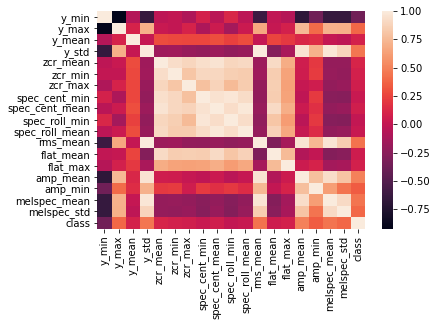

In [21]:
sns.heatmap(df.corr())

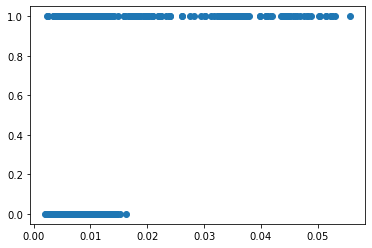

In [22]:
plt.scatter(df["melspec_mean"],df["class"])

In [23]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1])

In [24]:
pipeline_lr = Pipeline([('scalar1',StandardScaler()),
                        ('lr_classifier',LogisticRegression(random_state=0))])

pipeline_rf = Pipeline([('scalar2',StandardScaler()),
                        ('rf_classifier',RandomForestClassifier(n_estimators=int((len(df.columns)**0.5//1)+2), criterion= 'entropy',random_state=0))])

pipeline_dt = Pipeline([('scalar3',StandardScaler()),
                        ('dt_classifier',DecisionTreeClassifier(criterion="entropy",random_state=0))])

pipeline_GaussianNB = Pipeline([('scalar4',StandardScaler()),
                        ('gaussianNB_classifier',GaussianNB())])

pipeline_SVM = Pipeline([('scalar5',StandardScaler()),
                        ('svm_classifier',SVC(kernel="linear",C=1))])


In [25]:
pipelines = [pipeline_lr,pipeline_rf,pipeline_dt,pipeline_GaussianNB,pipeline_SVM]

pipe_dict = {0:'Logistic Regression',1:'Random Forest',2:'Decision Tree',3:'GaussianNB',4:'Support Vector Machine'}

In [26]:
import warnings
warnings.filterwarnings('ignore')

for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [27]:
best_f1=0.0
best_classifier_indx = 0
best_pipeline=""
evaluation_metrics = ["f1","accuracy","precision","recall"]

In [28]:
result = {}
list_of_results = []

In [29]:
for i,model in enumerate(pipelines):
    pred = model.predict(X_test)
    print(f"{pipe_dict[i]}")
    result.update()
    for metric in evaluation_metrics:
        scores = np.round(cross_val_score(model,df.iloc[:,:-1],df.iloc[:,-1], cv=5,scoring=metric),2)
        print(f"{pipe_dict[i]} {metric}: {scores}, mean: {np.mean(scores)}")
        result.update({"model":pipe_dict[i],
                       metric+"scores":scores,
                       metric+"_mean":np.mean(scores)})
        
    
    score = cross_val_score(model,df.iloc[:,:-1],df.iloc[:,-1], cv=5,scoring="f1")
    print(f"mean f1 = {np.mean(score)}, best f1: {best_f1}")
 

    if np.mean(score)>best_f1:

        best_f1 =  np.mean(score)
        best_pipeline=model
        best_classifier_idnx = i
    list_of_results.append(result)
    result = {}

print(f"Classifier with the best accuracy:{pipe_dict[best_classifier_idnx]}")

Logistic Regression
Logistic Regression f1: [0.77 0.54 0.16 0.09 0.53], mean: 0.418
Logistic Regression accuracy: [0.96 0.93 0.9  0.88 0.92], mean: 0.9179999999999999
Logistic Regression precision: [0.98 1.   0.89 0.29 0.8 ], mean: 0.792
Logistic Regression recall: [0.64 0.37 0.09 0.05 0.39], mean: 0.308
mean f1 = 0.4190946742362801, best f1: 0.0
Random Forest
Random Forest f1: [0.83 0.7  0.4  0.23 0.49], mean: 0.5299999999999999
Random Forest accuracy: [0.97 0.95 0.91 0.9  0.92], mean: 0.93
Random Forest precision: [1.   0.98 0.76 0.65 0.77], mean: 0.8320000000000001
Random Forest recall: [0.71 0.54 0.27 0.14 0.36], mean: 0.404
mean f1 = 0.5309435447801955, best f1: 0.4190946742362801
Decision Tree
Decision Tree f1: [0.73 0.62 0.49 0.3  0.46], mean: 0.52
Decision Tree accuracy: [0.94 0.92 0.9  0.88 0.89], mean: 0.9059999999999999
Decision Tree precision: [0.72 0.61 0.52 0.39 0.49], mean: 0.546
Decision Tree recall: [0.75 0.63 0.46 0.24 0.42], mean: 0.5
mean f1 = 0.5190827462880316, be

In [30]:
evaluation_metrics_df = pd.DataFrame(list_of_results)
evaluation_metrics_df

,model,f1scores,f1_mean,accuracyscores,accuracy_mean,precisionscores,precision_mean,recallscores,recall_mean
0,Logistic Regression,"[0.77, 0.54, 0.16, 0.09, 0.53]",0.418,"[0.96, 0.93, 0.9, 0.88, 0.92]",0.918,"[0.98, 1.0, 0.89, 0.29, 0.8]",0.792,"[0.64, 0.37, 0.09, 0.05, 0.39]",0.308
1,Random Forest,"[0.83, 0.7, 0.4, 0.23, 0.49]",0.530,"[0.97, 0.95, 0.91, 0.9, 0.92]",0.930,"[1.0, 0.98, 0.76, 0.65, 0.77]",0.832,"[0.71, 0.54, 0.27, 0.14, 0.36]",0.404
2,Decision Tree,"[0.73, 0.62, 0.49, 0.3, 0.46]",0.520,"[0.94, 0.92, 0.9, 0.88, 0.89]",0.906,"[0.72, 0.61, 0.52, 0.39, 0.49]",0.546,"[0.75, 0.63, 0.46, 0.24, 0.42]",0.500
3,GaussianNB,"[0.75, 0.56, 0.33, 0.22, 0.28]",0.428,"[0.95, 0.92, 0.9, 0.86, 0.72]",0.870,"[0.86, 0.64, 0.57, 0.27, 0.2]",0.508,"[0.66, 0.51, 0.23, 0.19, 0.51]",0.420
4,Support Vector Machine,"[0.78, 0.47, 0.08, 0.08, 0.45]",0.372,"[0.96, 0.93, 0.9, 0.9, 0.92]",0.922,"[1.0, 1.0, 0.8, 1.0, 1.0]",0.960,"[0.64, 0.31, 0.04, 0.04, 0.29]",0.264


In [31]:
pred = pipeline_rf.predict(X_test)

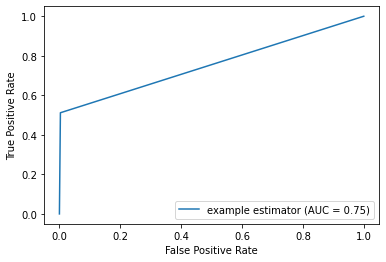

In [32]:
fpr, tpr, thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
        estimator_name='example estimator')

display.plot()
plt.show()

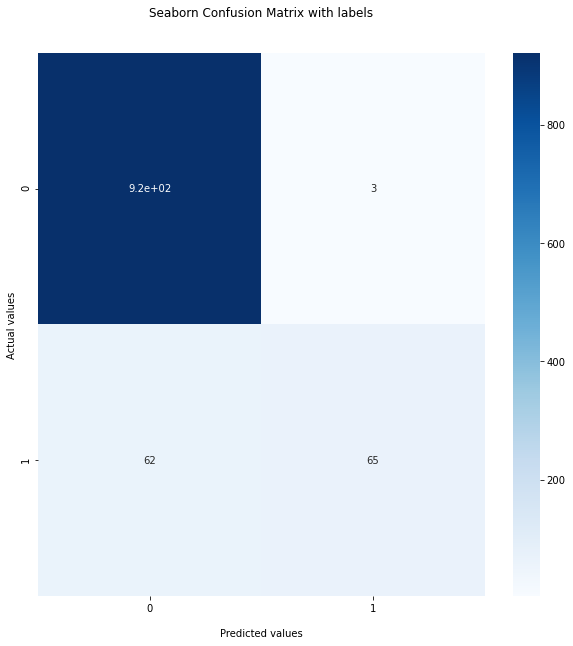

In [33]:

cm = confusion_matrix(y_test,pred)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual values');

## Ticket labels - List must be in alphabetical order


## Display the visualization of the Confusion Matrix.
plt.show()
